In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
path = os.path.realpath(os.path.join(os.getcwd(),'../'))
sys.path.insert(0, path)
import astro_datasets

/Users/adammoss/opt/anaconda3/envs/astro_datasets/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds, info = tfds.load(name='mlsst/Y1', split='train', with_info=True, as_supervised=True)

2022-09-08 17:11:02.949350: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.56 url/s]
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.82 url/s]
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 93.01 url/s]
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 88.02 url/s]
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 97.41 url/s]
Dl Completed...: 0 url [00:00, ? url/s]
Generating splits...:   0%|                                                                  | 0/3 [00:00<?, ? splits/s]
Generating train examples...: 0 ex

Generating train examples...: 1065 examples [00:12, 214.29 examples/s]
Generating train examples...: 1087 examples [00:12, 215.11 examples/s]
Generating train examples...: 1111 examples [00:12, 219.96 examples/s]
Generating train examples...: 1135 examples [00:12, 223.96 examples/s]
Generating train examples...: 1158 examples [00:12, 225.44 examples/s]
Generating train examples...: 1181 examples [00:12, 226.31 examples/s]
Generating train examples...: 1204 examples [00:13, 221.01 examples/s]
Generating train examples...: 1228 examples [00:13, 223.59 examples/s]
Generating train examples...: 1251 examples [00:13, 224.46 examples/s]
Generating train examples...: 1275 examples [00:13, 227.13 examples/s]
Generating train examples...: 1299 examples [00:13, 229.07 examples/s]
Generating train examples...: 1323 examples [00:13, 230.80 examples/s]
Generating train examples...: 1347 examples [00:13, 229.64 examples/s]
Generating train examples...: 1370 examples [00:13, 229.59 examples/s]
Genera

Generating train examples...: 3618 examples [00:23, 223.91 examples/s]
Generating train examples...: 3642 examples [00:24, 227.58 examples/s]
Generating train examples...: 3666 examples [00:24, 229.76 examples/s]
Generating train examples...: 3689 examples [00:24, 226.26 examples/s]
Generating train examples...: 3712 examples [00:24, 218.56 examples/s]
Generating train examples...: 3734 examples [00:24, 213.47 examples/s]
Generating train examples...: 3756 examples [00:24, 211.80 examples/s]
Generating train examples...: 3778 examples [00:24, 193.27 examples/s]
Generating train examples...: 3798 examples [00:24, 189.40 examples/s]
Generating train examples...: 3821 examples [00:24, 198.68 examples/s]
Generating train examples...: 3845 examples [00:25, 208.67 examples/s]
Generating train examples...: 3869 examples [00:25, 216.79 examples/s]
Generating train examples...: 3894 examples [00:25, 224.04 examples/s]
Generating train examples...: 3917 examples [00:25, 218.55 examples/s]
Genera

Generating train examples...: 6003 examples [00:35, 177.83 examples/s]
Generating train examples...: 6023 examples [00:36, 183.28 examples/s]
Generating train examples...: 6043 examples [00:36, 186.59 examples/s]
Generating train examples...: 6065 examples [00:36, 193.79 examples/s]
Generating train examples...: 6085 examples [00:36, 191.12 examples/s]
Generating train examples...: 6105 examples [00:36, 172.91 examples/s]
Generating train examples...: 6123 examples [00:36, 170.84 examples/s]
Generating train examples...: 6146 examples [00:36, 186.63 examples/s]
Generating train examples...: 6170 examples [00:36, 200.94 examples/s]
Generating train examples...: 6195 examples [00:36, 212.63 examples/s]
Generating train examples...: 6219 examples [00:37, 220.23 examples/s]
Generating train examples...: 6242 examples [00:37, 221.56 examples/s]
Generating train examples...: 6265 examples [00:37, 221.07 examples/s]
Generating train examples...: 6288 examples [00:37, 223.55 examples/s]
Genera

Generating train examples...: 8519 examples [00:47, 230.07 examples/s]
Generating train examples...: 8543 examples [00:47, 227.58 examples/s]
Generating train examples...: 8566 examples [00:47, 226.71 examples/s]
Generating train examples...: 8589 examples [00:47, 227.46 examples/s]
Generating train examples...: 8613 examples [00:47, 230.74 examples/s]
Generating train examples...: 8638 examples [00:48, 234.01 examples/s]
Generating train examples...: 8662 examples [00:48, 233.99 examples/s]
Generating train examples...: 8687 examples [00:48, 235.98 examples/s]
Generating train examples...: 8711 examples [00:48, 236.03 examples/s]
Generating train examples...: 8735 examples [00:48, 236.97 examples/s]
Generating train examples...: 8759 examples [00:50, 33.34 examples/s] 
Generating train examples...: 8780 examples [00:50, 43.14 examples/s]
Generating train examples...: 8800 examples [00:50, 54.59 examples/s]
Generating train examples...: 8823 examples [00:50, 71.20 examples/s]
Generatin

Generating train examples...: 10901 examples [01:01, 200.61 examples/s]
Generating train examples...: 10924 examples [01:01, 207.65 examples/s]
Generating train examples...: 10948 examples [01:01, 214.64 examples/s]
Generating train examples...: 10971 examples [01:01, 218.64 examples/s]
Generating train examples...: 10995 examples [01:01, 223.13 examples/s]
Generating train examples...: 11019 examples [01:01, 225.70 examples/s]
Generating train examples...: 11043 examples [01:01, 227.23 examples/s]
Generating train examples...: 11066 examples [01:01, 224.81 examples/s]
Generating train examples...: 11089 examples [01:02, 225.77 examples/s]
Generating train examples...: 11112 examples [01:02, 226.24 examples/s]
Generating train examples...: 11135 examples [01:02, 220.91 examples/s]
Generating train examples...: 11158 examples [01:02, 222.27 examples/s]
Generating train examples...: 11181 examples [01:02, 223.42 examples/s]
Generating train examples...: 11204 examples [01:02, 225.17 exam

Generating train examples...: 13398 examples [01:12, 195.42 examples/s]
Generating train examples...: 13419 examples [01:12, 197.75 examples/s]
Generating train examples...: 13442 examples [01:12, 204.43 examples/s]
Generating train examples...: 13463 examples [01:12, 205.39 examples/s]
Generating train examples...: 13486 examples [01:13, 211.35 examples/s]
Generating train examples...: 13509 examples [01:13, 214.79 examples/s]
Generating train examples...: 13531 examples [01:13, 213.55 examples/s]
Generating train examples...: 13553 examples [01:13, 215.37 examples/s]
Generating train examples...: 13576 examples [01:13, 218.30 examples/s]
Generating train examples...: 13598 examples [01:13, 215.63 examples/s]
Generating train examples...: 13620 examples [01:13, 214.19 examples/s]
Generating train examples...: 13643 examples [01:13, 216.23 examples/s]
Generating train examples...: 13667 examples [01:13, 221.38 examples/s]
Generating train examples...: 13690 examples [01:13, 223.33 exam

Generating train examples...: 15841 examples [01:24, 158.31 examples/s]
Generating train examples...: 15858 examples [01:24, 149.55 examples/s]
Generating train examples...: 15879 examples [01:24, 163.98 examples/s]
Generating train examples...: 15896 examples [01:24, 153.27 examples/s]
Generating train examples...: 15915 examples [01:24, 162.19 examples/s]
Generating train examples...: 15936 examples [01:24, 173.45 examples/s]
Generating train examples...: 15954 examples [01:24, 173.04 examples/s]
Generating train examples...: 15972 examples [01:24, 163.42 examples/s]
Generating train examples...: 15989 examples [01:25, 154.44 examples/s]
Generating train examples...: 16010 examples [01:25, 168.17 examples/s]
Generating train examples...: 16029 examples [01:25, 159.92 examples/s]
Generating train examples...: 16046 examples [01:25, 157.91 examples/s]
Generating train examples...: 16066 examples [01:25, 167.35 examples/s]
Generating train examples...: 16086 examples [01:25, 176.08 exam

Generating train examples...: 18214 examples [01:35, 224.84 examples/s]
Generating train examples...: 18237 examples [01:36, 225.86 examples/s]
Generating train examples...: 18260 examples [01:36, 225.96 examples/s]
Generating train examples...: 18283 examples [01:36, 225.71 examples/s]
Generating train examples...: 18306 examples [01:36, 220.17 examples/s]
Generating train examples...: 18329 examples [01:36, 211.96 examples/s]
Generating train examples...: 18352 examples [01:36, 215.86 examples/s]
Generating train examples...: 18374 examples [01:36, 211.86 examples/s]
Generating train examples...: 18396 examples [01:36, 207.21 examples/s]
Generating train examples...: 18417 examples [01:36, 203.90 examples/s]
Generating train examples...: 18439 examples [01:36, 205.93 examples/s]
Generating train examples...: 18460 examples [01:37, 203.11 examples/s]
Generating train examples...: 18481 examples [01:37, 200.93 examples/s]
Generating train examples...: 18502 examples [01:37, 182.96 exam

Generating train examples...: 20728 examples [01:47, 228.43 examples/s]
Generating train examples...: 20751 examples [01:47, 228.68 examples/s]
Generating train examples...: 20775 examples [01:47, 229.29 examples/s]
Generating train examples...: 20799 examples [01:47, 230.35 examples/s]
Generating train examples...: 20823 examples [01:47, 230.86 examples/s]
Generating train examples...: 20847 examples [01:47, 230.94 examples/s]
Generating train examples...: 20871 examples [01:47, 227.66 examples/s]
Generating train examples...: 20894 examples [01:47, 228.21 examples/s]
Generating train examples...: 20917 examples [01:48, 227.13 examples/s]
Generating train examples...: 20941 examples [01:48, 228.69 examples/s]
Generating train examples...: 20965 examples [01:48, 229.10 examples/s]
Generating train examples...: 20988 examples [01:48, 226.21 examples/s]
Generating train examples...: 21011 examples [01:48, 226.62 examples/s]
Generating train examples...: 21034 examples [01:48, 227.07 exam

Generating train examples...: 23282 examples [01:58, 228.88 examples/s]
Generating train examples...: 23306 examples [01:58, 230.71 examples/s]
Generating train examples...: 23330 examples [01:58, 231.63 examples/s]
Generating train examples...: 23354 examples [01:58, 232.86 examples/s]
Generating train examples...: 23378 examples [01:58, 231.39 examples/s]
Generating train examples...: 23402 examples [01:59, 233.03 examples/s]
Generating train examples...: 23426 examples [01:59, 228.15 examples/s]
Generating train examples...: 23450 examples [01:59, 230.03 examples/s]
Generating train examples...: 23474 examples [01:59, 230.95 examples/s]
                                                                       
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:   0%| | 0/23487 [00:00<?, ? ex
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:   1%| | 187/23487 [00:00<00:12
Shuffling ~/tensorflow_datasets/mlsst/

Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:  47%|▍| 11041/23487 [00:06<00:
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:  48%|▍| 11227/23487 [00:06<00:
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:  49%|▍| 11418/23487 [00:06<00:
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:  49%|▍| 11605/23487 [00:06<00:
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:  50%|▌| 11782/23487 [00:07<00:
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:  51%|▌| 11967/23487 [00:07<00:
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:  52%|▌| 12164/23487 [00:07<00:
Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...:  53%|▌| 12344/23487 [00:07<00:
Shuffling ~/tensorflow_datasets/

Shuffling ~/tensorflow_datasets/mlsst/Y1/1.0.1.incompleteZ98SZ2/mlsst-train.tfrecord*...: 100%|▉| 23473/23487 [00:13<00:
Generating splits...:  33%|███████████████████                                      | 1/3 [02:13<04:26, 133.44s/ splits]
Generating validation examples...: 0 examples [00:00, ? examples/s]
Generating validation examples...: 1 examples [00:00,  1.18 examples/s]
Generating validation examples...: 24 examples [00:00, 34.27 examples/s]
Generating validation examples...: 47 examples [00:01, 67.60 examples/s]
Generating validation examples...: 71 examples [00:01, 101.11 examples/s]
Generating validation examples...: 96 examples [00:01, 133.39 examples/s]
Generating validation examples...: 120 examples [00:01, 158.35 examples/s]
Generating validation examples...: 145 examples [00:01, 180.39 examples/s]
Generating validation examples...: 170 examples [00:01, 198.55 examples/s]
Generating validation examples...: 195 examples [00:01, 210.99 examples/s]
Generating validation ex

Generating validation examples...: 2463 examples [00:11, 239.09 examples/s]
Generating validation examples...: 2488 examples [00:11, 239.86 examples/s]
Generating validation examples...: 2512 examples [00:11, 236.21 examples/s]
Generating validation examples...: 2537 examples [00:11, 239.08 examples/s]
Generating validation examples...: 2562 examples [00:11, 241.12 examples/s]
Generating validation examples...: 2587 examples [00:11, 242.31 examples/s]
Generating validation examples...: 2612 examples [00:11, 243.26 examples/s]
Generating validation examples...: 2637 examples [00:11, 243.94 examples/s]
Generating validation examples...: 2662 examples [00:11, 244.28 examples/s]
Generating validation examples...: 2687 examples [00:12, 243.49 examples/s]
Generating validation examples...: 2712 examples [00:12, 242.97 examples/s]
Generating validation examples...: 2737 examples [00:12, 243.24 examples/s]
Generating validation examples...: 2762 examples [00:12, 241.19 examples/s]
Generating v

Generating test examples...: 1125 examples [00:06, 229.66 examples/s]
Generating test examples...: 1148 examples [00:06, 228.06 examples/s]
Generating test examples...: 1171 examples [00:06, 227.38 examples/s]
Generating test examples...: 1194 examples [00:07, 224.84 examples/s]
Generating test examples...: 1217 examples [00:07, 224.68 examples/s]
Generating test examples...: 1240 examples [00:07, 222.56 examples/s]
Generating test examples...: 1263 examples [00:07, 223.33 examples/s]
Generating test examples...: 1286 examples [00:07, 221.50 examples/s]
Generating test examples...: 1309 examples [00:07, 220.27 examples/s]
Generating test examples...: 1332 examples [00:07, 219.33 examples/s]
Generating test examples...: 1354 examples [00:07, 218.22 examples/s]
Generating test examples...: 1376 examples [00:07, 218.38 examples/s]
Generating test examples...: 1399 examples [00:07, 221.09 examples/s]
Generating test examples...: 1422 examples [00:08, 222.36 examples/s]
Generating test exam

Generating test examples...: 3755 examples [00:18, 228.58 examples/s]
Generating test examples...: 3779 examples [00:18, 231.46 examples/s]
Generating test examples...: 3804 examples [00:18, 234.49 examples/s]
Generating test examples...: 3828 examples [00:18, 235.82 examples/s]
Generating test examples...: 3853 examples [00:18, 237.47 examples/s]
Generating test examples...: 3877 examples [00:18, 230.80 examples/s]
Generating test examples...: 3901 examples [00:18, 223.67 examples/s]
Generating test examples...: 3924 examples [00:19, 214.28 examples/s]
Generating test examples...: 3946 examples [00:19, 215.09 examples/s]
Generating test examples...: 3970 examples [00:19, 219.95 examples/s]
Generating test examples...: 3993 examples [00:19, 222.22 examples/s]
Generating test examples...: 4016 examples [00:19, 218.54 examples/s]
Generating test examples...: 4038 examples [00:19, 214.13 examples/s]
Generating test examples...: 4060 examples [00:19, 212.75 examples/s]
Generating test exam

Generating test examples...: 6340 examples [00:30, 210.36 examples/s]
Generating test examples...: 6362 examples [00:30, 207.99 examples/s]
Generating test examples...: 6384 examples [00:30, 209.09 examples/s]
Generating test examples...: 6405 examples [00:30, 203.00 examples/s]
Generating test examples...: 6426 examples [00:30, 202.29 examples/s]
Generating test examples...: 6447 examples [00:30, 201.06 examples/s]
Generating test examples...: 6469 examples [00:30, 204.59 examples/s]
Generating test examples...: 6491 examples [00:30, 207.26 examples/s]
Generating test examples...: 6513 examples [00:30, 208.70 examples/s]
Generating test examples...: 6534 examples [00:31, 208.55 examples/s]
Generating test examples...: 6555 examples [00:31, 208.23 examples/s]
Generating test examples...: 6577 examples [00:31, 209.34 examples/s]
Generating test examples...: 6598 examples [00:31, 208.57 examples/s]
Generating test examples...: 6619 examples [00:31, 207.87 examples/s]
Generating test exam

Dataset mlsst downloaded and prepared to ~/tensorflow_datasets/mlsst/Y1/1.0.1. Subsequent calls will reuse this data.


In [3]:
print(info)

tfds.core.DatasetInfo(
    name='mlsst',
    full_name='mlsst/Y1/1.0.1',
    description="""
    The Mock LSST dataset consists of 2 sets of survey-emulating images, by applying an  exposure time directly to raw images: low-noise 10 year (Y10) survey, high-noise 1 year (Y1).The data is split into 3 sets: training, validation and testing.
    """,
    homepage='https://zenodo.org/record/5514180#.Yt-gRnbMIjJ',
    data_path='~/tensorflow_datasets/mlsst/Y1/1.0.1',
    file_format=tfrecord,
    download_size=7.50 GiB,
    dataset_size=3.75 GiB,
    features=FeaturesDict({
        'image': Tensor(shape=(100, 100, 3), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=6715, num_shards=8>,
        'train': <SplitInfo num_examples=23487, num_shards=32>,
        'validation': <SplitInfo num_examples=3355, num_shards=4>,
    },
  

In [4]:
def normalize(image, label):  
  image = tf.math.asinh(image)
  return image, label

ds = ds.map(normalize)

tf.Tensor(2, shape=(), dtype=int64)
(100, 100, 3)


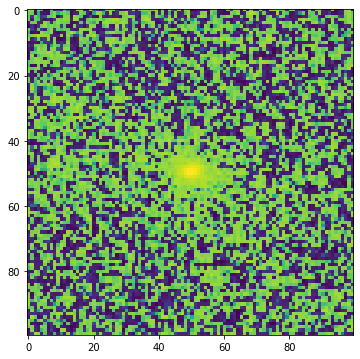

tf.Tensor(0, shape=(), dtype=int64)
(100, 100, 3)


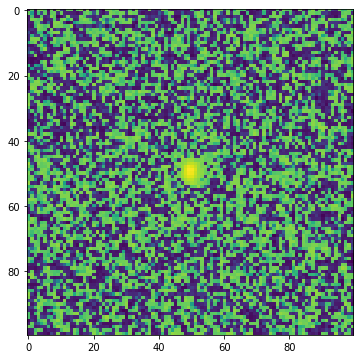

In [5]:
for d in ds.take(2):
    inputs, label = d
    print(label)
    print(inputs.shape)
    plt.figure(figsize=(6, 6))
    plt.imshow(inputs[:,:,0])
    plt.show()